# 10. Morphological Operations

## Table of Contents
1. [Libraries](#libraries)
2. [Erosion](#erosion)
3. [Dilation](#dilation)
4. [Opening](#opening)
5. [Closing](#closing)
6. [Morphological Gradient](#gradient)
7. [Morphological Hats](#hats)
   1. [Top or White Hat](#top)
   1. [Black Hat](#black)

## Importing Libraries <a class="anchor" id="libraries" ></a>

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
img = cv2.imread("data/image.jpg")
img1 = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img2 = cv2.imread("data/image.jpg",0)

(400, 700, 3) (400, 700, 3) (400, 700)


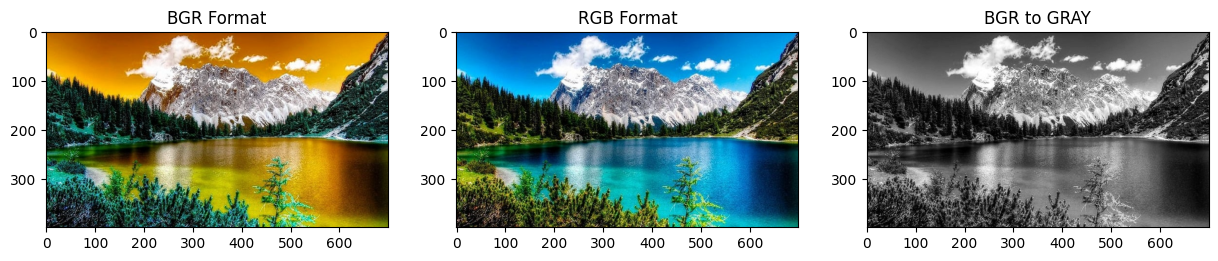

In [3]:
#function to see image
def imgshow(img=img,img1=img1,img2=img2, rows=1,columns=3):
    print(img.shape,img1.shape,img2.shape)
    fig = plt.figure(figsize=(15,8))
    #adds a subplot at 1st position
    fig.add_subplot(rows,columns,1)
    plt.title('BGR Format')
    plt.imshow(img)

    #adds a subplot at 2nd position
    fig.add_subplot(rows,columns,2)
    plt.title('RGB Format')
    plt.imshow(img1)

    #adds a subplot at 3rd position
    fig.add_subplot(rows,columns, 3)
    plt.title('BGR to GRAY')
    plt.imshow(img2,cmap="gray")
    plt.show()
    
imgshow(img=img,img1=img1,img2=img2, rows=1,columns=3)

## Erosion <a class="anchor" id="erosion" ></a>

Erosin primarily involves eroding(thinning) outer surface(foreground) of image
- Tt is suggested to have foreground as white

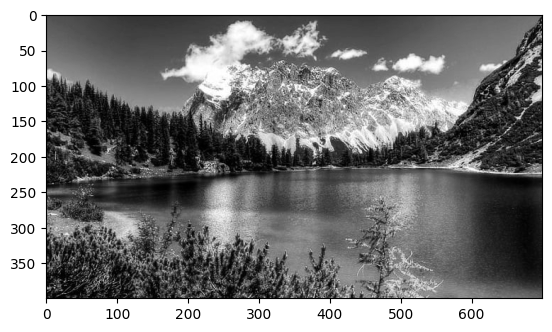

In [4]:
BGR2GRAY = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
plt.imshow(BGR2GRAY,cmap="gray")
plt.show()

Eroding boundy of image upto 3 level

La erosión es una operación morfológica que elimina píxeles en los bordes de los objetos en una imagen. El número de iteraciones de la erosión aumenta en cada iteración del bucle.


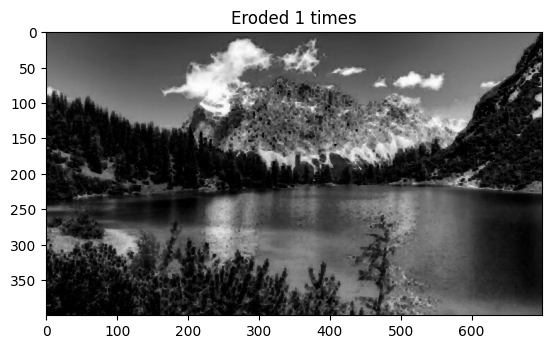

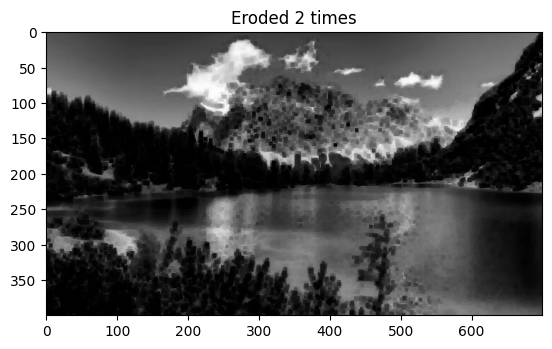

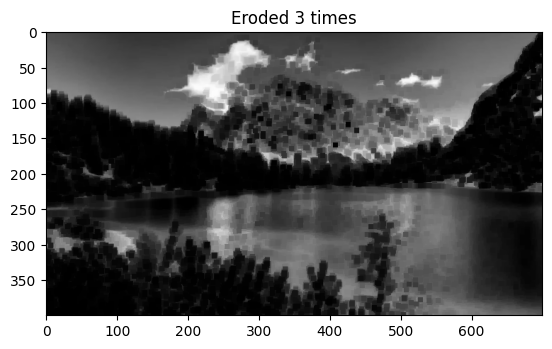

In [35]:
def plt_imshow(title, image):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.imshow(image)
    plt.title(title)
    plt.grid(False)
    plt.show()
    
for i in range(0,3):
    eroded = cv2.erode(BGR2GRAY.copy(), None, iterations=i+1)
    plt_imshow("Eroded {} times".format(i+1), eroded)

### Binarize Image

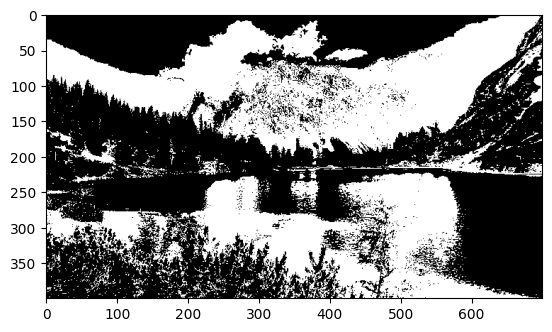

In [8]:
binr = cv2.threshold(BGR2GRAY, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]
image = cv2.cvtColor(binr, cv2.COLOR_BGR2RGB)
plt.imshow(image)
plt.show()

### We can Invert Image to keep foreground in white

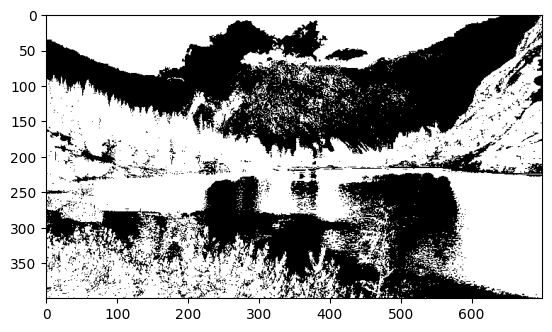

In [9]:
invert = cv2.bitwise_not(binr)
image = cv2.cvtColor(invert, cv2.COLOR_BGR2RGB)
plt.imshow(image)
plt.show()

Then, we can define a kernel of $5 \times 5$ to use in erosion

In [15]:
kernel = np.ones((2,2), np.uint8) #check for 3*3 or 7*7 kernel size too
print(kernel)

[[1 1]
 [1 1]]


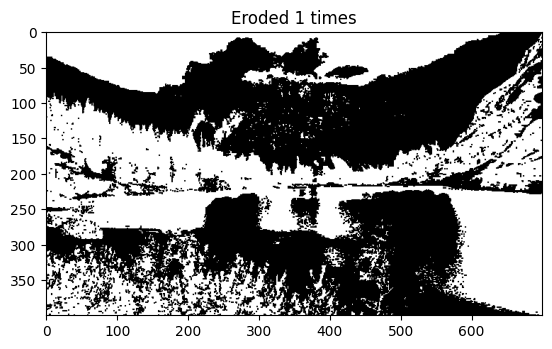

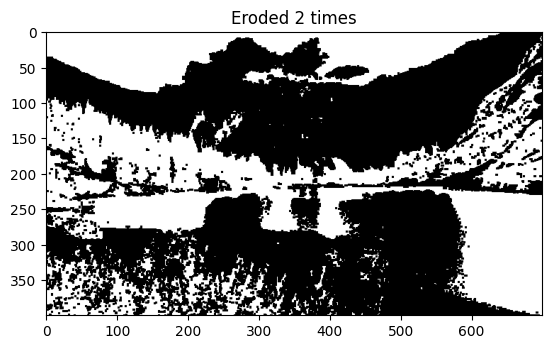

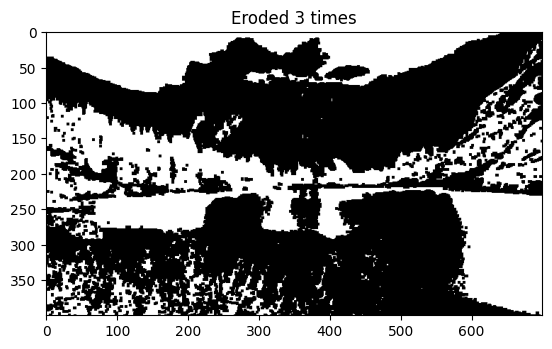

In [16]:
for i in range(0,3):
    eroded = cv2.erode(invert.copy(),kernel=kernel, iterations=i+1)
    plt_imshow("Eroded {} times".format(i+1), eroded)

## Dilation <a class="anchor" id="dilation" ></a>

Involves dilating outer surface (foreground) of image
- For joining broken parts of an image together

Este código convierte una imagen en escala de grises a una imagen binaria, invierte los colores de la imagen binaria, dilata la imagen binaria y luego muestra la imagen dilatada. **Especialmente util cuando se necesita resaltar o ampliar características específicas de una imagen.**

Preprocesamiento de imágenes para OCR (Reconocimiento Óptico de Caracteres): La dilatación puede ayudar a unir partes de caracteres que pueden haberse separado debido a variaciones de luz o ruido en la imagen. Esto puede mejorar la precisión del OCR.

Eliminación de ruido: La inversión de colores seguida de la dilatación puede ser útil para eliminar pequeños puntos de ruido en una imagen. Los píxeles de ruido se vuelven blancos después de la inversión de colores y luego se eliminan durante la dilatación.

Resaltar características en imágenes médicas: En imágenes médicas, como las radiografías, la dilatación puede ayudar a resaltar características específicas, como tumores o fracturas.

Análisis de formas en imágenes: La dilatación puede ayudar a resaltar y analizar formas en una imagen al hacer que las formas sean más grandes y más fáciles de detectar.

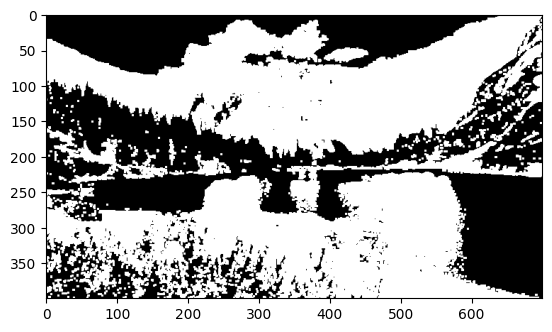

In [17]:
#binarize image
binr = cv2.threshold(BGR2GRAY,0,255,cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]
kernel = np.ones((3,3),np.uint8)
invert = cv2.bitwise_not(binr)

#dilate image
dilation = cv2.dilate(binr, kernel, iterations=1)
 
plt.imshow(dilation, cmap='gray')
plt.show()

We can apply series of dilations on inverted image using no kernel


Este código dilata una imagen tres veces, aumentando el número de dilataciones en cada iteración, y muestra las imágenes dilatadas.

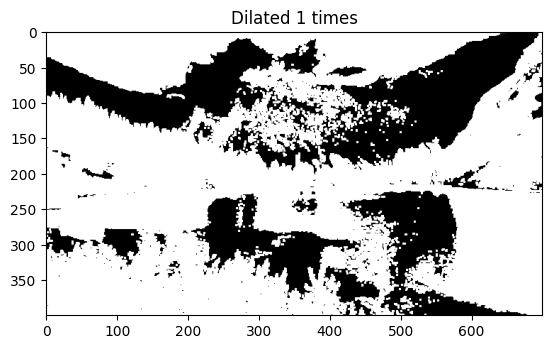

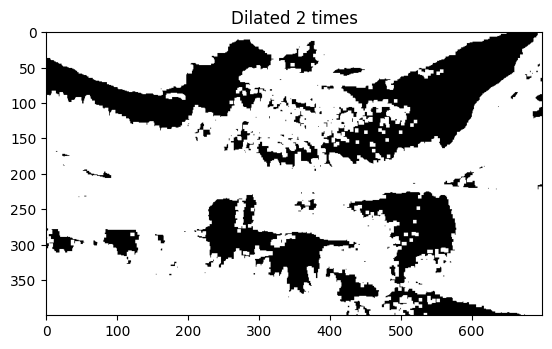

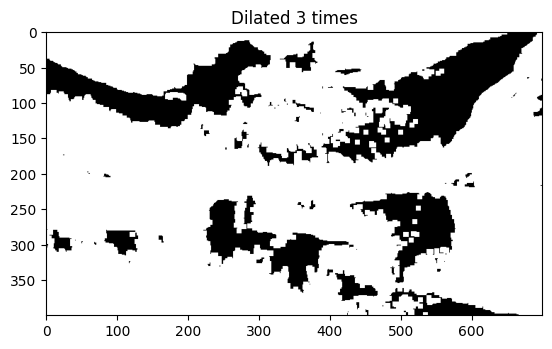

In [18]:
for i in range(0,3):
    dilated = cv2.dilate(invert.copy(),None,iterations= i+1)
    plt_imshow("Dilated {} times".format(i+1),dilated)

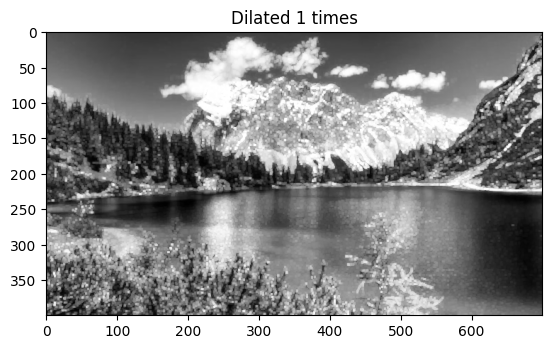

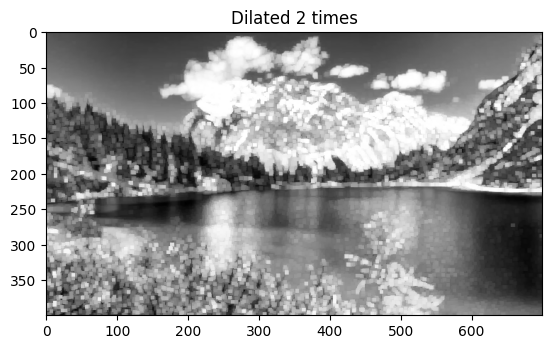

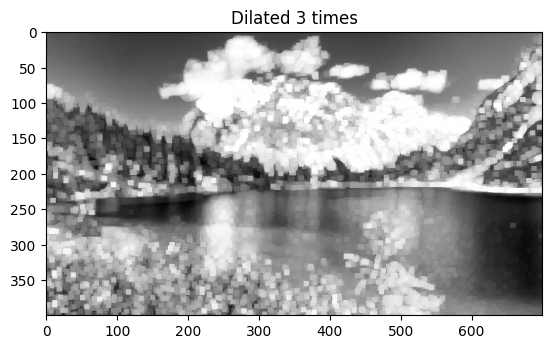

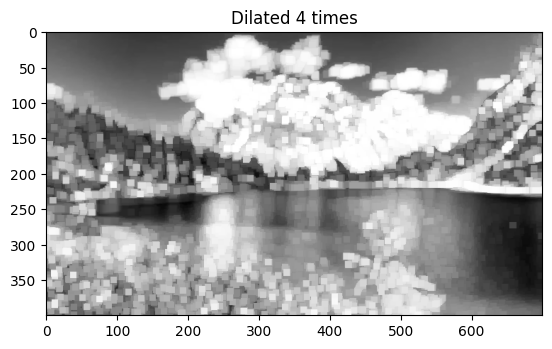

In [19]:
for i in range(0,4):
    dilated = cv2.dilate(BGR2GRAY.copy(),None,iterations= i+1)
    plt_imshow("Dilated {} times".format(i+1),dilated)

## Opening <a class="anchor" id="opening" ></a>

Erosion followed by dilation in outer surface (foreground) of image
- Generally used to remove noise (small blobs) in image


La apertura es una operación morfológica que consiste en una erosión seguida de una dilatación. **Es útil para eliminar el ruido de una imagen.** Este código realiza una operación de apertura en una imagen binaria y luego muestra la imagen resultante.

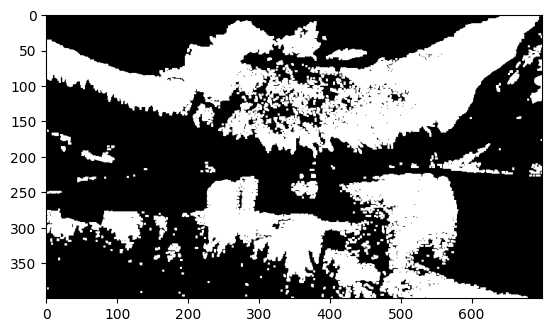

In [20]:
#opening image
opening = cv2.morphologyEx(binr,cv2.MORPH_OPEN,kernel,iterations=1)

#print output
plt.imshow(opening, cmap='gray')
plt.show()

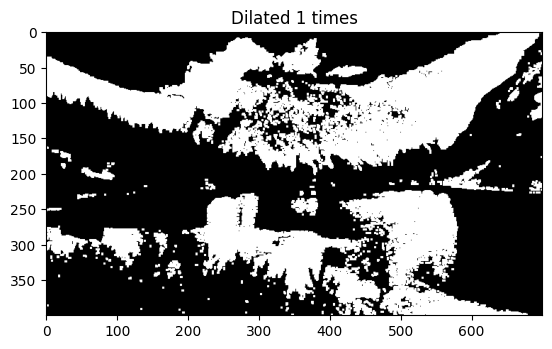

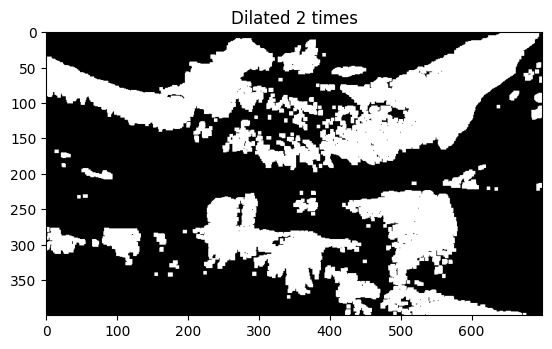

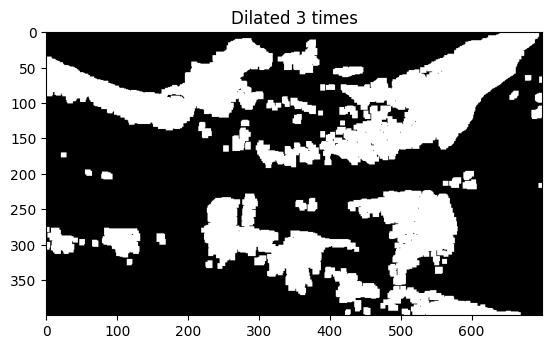

In [21]:
for i in range(0,3):
    opening = cv2.morphologyEx(binr.copy(),cv2.MORPH_OPEN,None,iterations= i+1)
    plt_imshow("Dilated {} times".format(i+1),opening)
    plt.show()

## Closing <a class="anchor" id="closing" ></a>

Dilation followed by erosion in outer surface (foreground) of image
- Generally used to close holes inside of objects or for connecting components together

El cierre es una operación morfológica que consiste en una dilatación seguida de una erosión. **Es útil para cerrar pequeños agujeros en los objetos de una imagen**. Este código realiza una operación de cierre en una imagen binaria y luego muestra la imagen resultante.

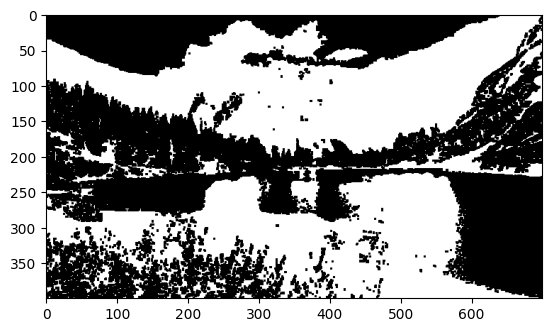

In [23]:
#closing image
closing = cv2.morphologyEx(binr, cv2.MORPH_CLOSE, kernel, iterations=1)
 
#print output
plt.imshow(closing,cmap='gray')
plt.show()

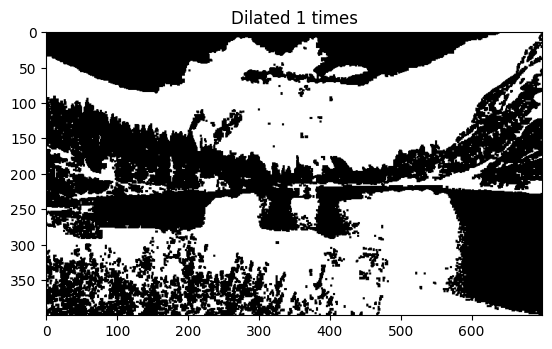

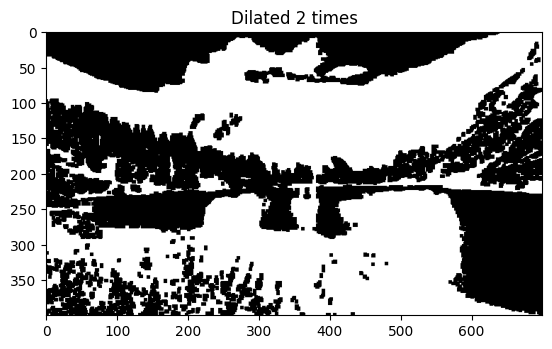

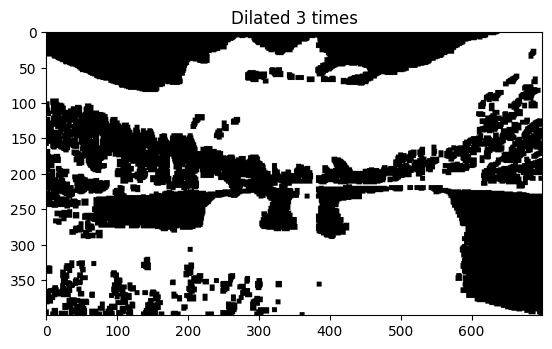

In [24]:
for i in range(0,3):
    closing = cv2.morphologyEx(binr.copy(),cv2.MORPH_CLOSE,None,iterations= i+1) #check for kernel
    plt_imshow("Dilated {} times".format(i+1),closing) 
    plt.show()

Iterating with different kernels

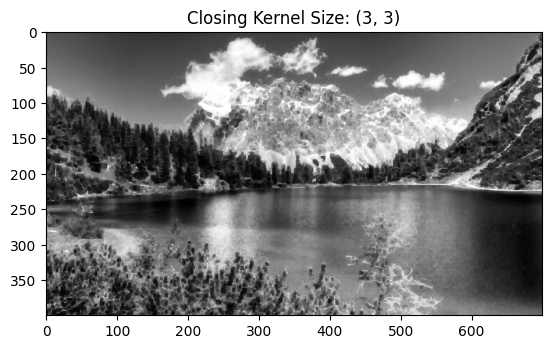

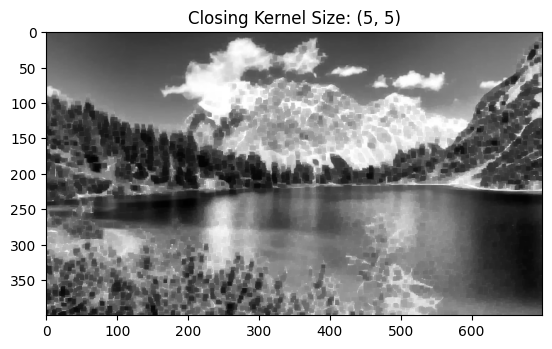

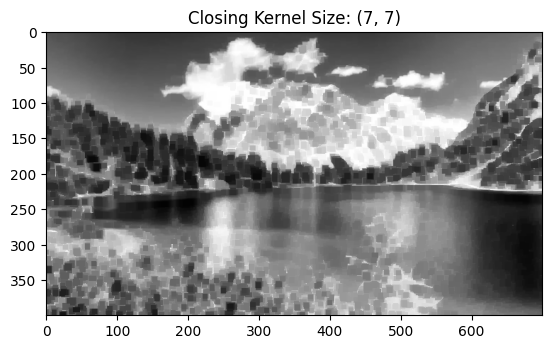

In [26]:
kernelSizes = [(3,3), (5,5), (7,7)] # Esta línea define una lista de tamaños de kernel que se utilizarán para la operación de cierre.
BGR2GRAY = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY) #Esta línea convierte una imagen en color (BGR) a escala de grises.

for kernelSize in kernelSizes:
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, kernelSize) # crea un elemento estructurante de forma rectangular con el tamaño especificado por kernelSize
    closing = cv2.morphologyEx(BGR2GRAY, cv2.MORPH_CLOSE, kernel) # aplica la operación de cierre a la imagen en escala de grises utilizando el kernel especificado
    plt_imshow("Closing Kernel Size: ({}, {})".format(kernelSize[0], kernelSize[1]), closing) # muestra la imagen resultante

## Morphological Gradient <a class="anchor" id="gradient" ></a>

It first applies erosion and dilation individually on image and then computes difference between eroded and dilated image

Realizando una operación de gradiente morfológico en una imagen y luego la muestra.
El gradiente morfológico es la diferencia entre la dilatación y la erosión de una imagen. **Se utiliza para resaltar los bordes de los objetos en la imagen**


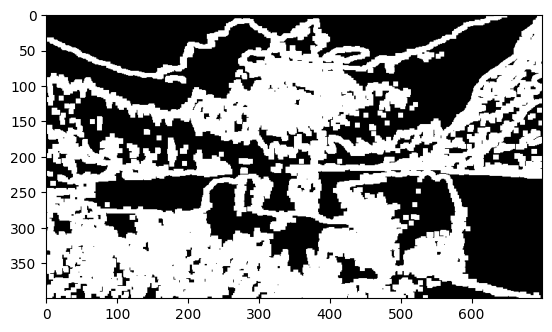

In [27]:
# use morph gradient
morph_gradient = cv2.morphologyEx(invert,cv2.MORPH_GRADIENT,kernel) # realiza una operación de gradiente morfológico en la imagen invert
 
#print output
plt.imshow(morph_gradient, cmap='gray') # muestra la imagen resultante
plt.show()

En cada iteración del bucle, esta línea realiza una operación de gradiente morfológico en la imagen invert. El gradiente morfológico es la diferencia entre la dilatación y la erosión de una imagen. Se utiliza para resaltar los bordes de los objetos en la imagen. El argumento cv2.MORPH_GRADIENT especifica que se debe realizar una operación de gradiente morfológico, y kernel+i es el elemento estructurante utilizado para la dilatación y la erosión, que cambia de tamaño en cada iteración.

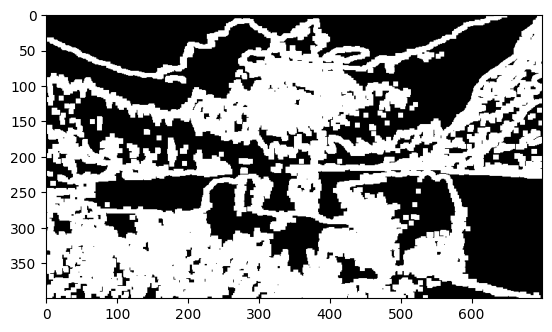

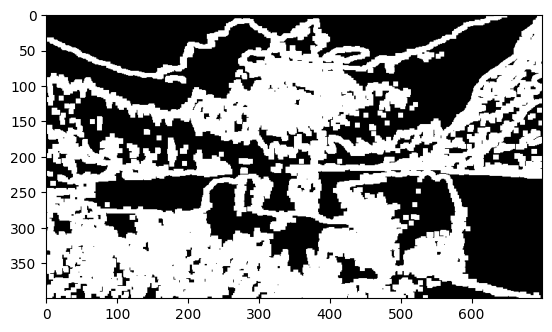

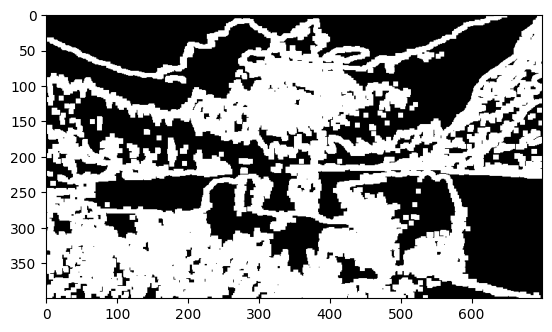

In [28]:
for i in range(0,3): 
    # use morph gradient
    morph_gradient = cv2.morphologyEx(invert,cv2.MORPH_GRADIENT,kernel+i)
    #print output
    plt.imshow(morph_gradient, cmap='gray')
    plt.show()

Iterating with different kernels

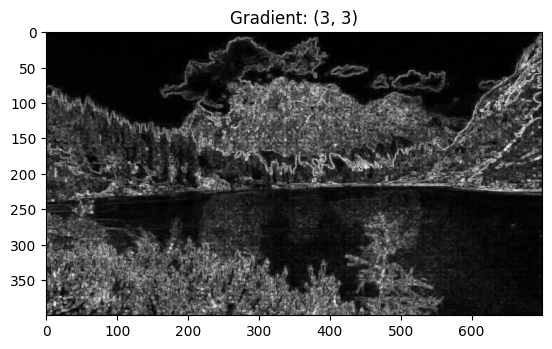

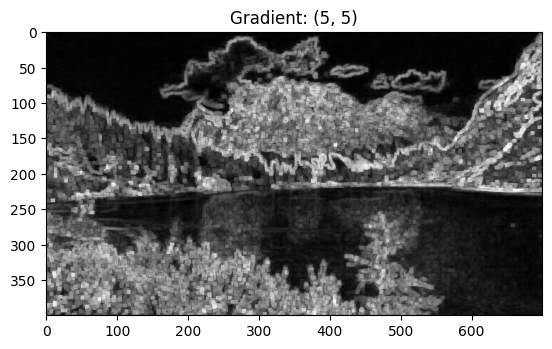

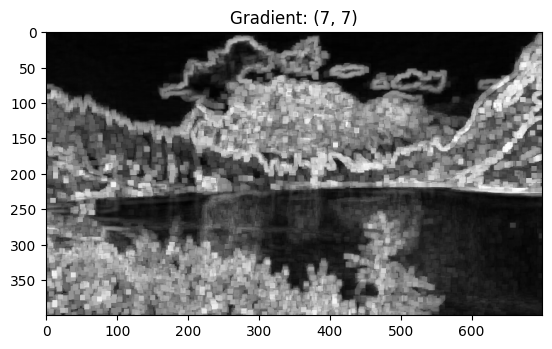

In [29]:
kernelSizes = [(3,3), (5,5), (7,7)]
BGR2GRAY = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

for kernelSize in kernelSizes:
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, kernelSize)
    gradient = cv2.morphologyEx(BGR2GRAY, cv2.MORPH_GRADIENT, kernel)
    plt_imshow("Gradient: ({}, {})".format(
        kernelSize[0], kernelSize[1]), gradient)

## Morphological Hats <a class="anchor" id="hats" ></a>

1. Top or White Hat
2. Black hat

### Top or White Hat <a class="anchor" id="top" ></a>

It is the difference between original (grayscale/single channel) input image and opening image

- Finds light(bright) regions of an image on dark background



El "Morphological Hat" (también conocido como "Top Hat" morfológico) es una operación morfológica que pertenece a la familia de transformaciones morfológicas. Es una combinación de la operación de apertura y la imagen original. La operación de apertura implica la erosión seguida de la dilatación, y el "Morphological Hat" resalta las diferencias entre la imagen original y la imagen obtenida después de aplicar la apertura.

La idea detrás del "Morphological Hat" es resaltar las pequeñas estructuras y detalles finos en una imagen que pueden no ser evidentes en la imagen original. Puede ser especialmente útil para realzar objetos pequeños o características locales.

El siguiente codigo crea un elemento estructurante de forma rectangular con un tamaño de 13x5. Este elemento estructurante se puede utilizar en operaciones morfológicas, como la erosión, la dilatación, la apertura y el cierre, para determinar cómo se modifica un píxel en función de sus vecinos.

In [30]:
#construct a kernel (13x5)
kernel = cv2.getStructuringElement(cv2.MORPH_RECT,(13,5))
kernel

array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]], dtype=uint8)

La operación de "Top Hat" es la diferencia entre la imagen de entrada y su apertura. **Esta operación es útil para resaltar elementos brillantes de la imagen sobre un fondo oscuro.**

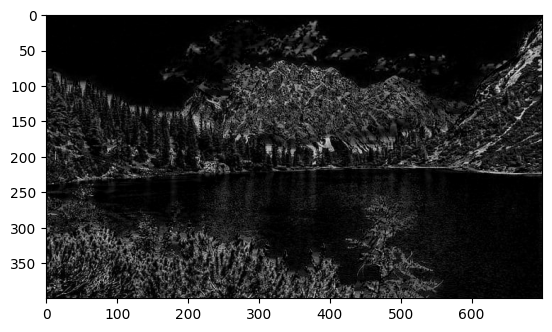

In [32]:
tophat = cv2.morphologyEx(BGR2GRAY, cv2.MORPH_TOPHAT, kernel)

plt.imshow(tophat, cmap='gray')
plt.show()

### Black Hat <a class="anchor" id="black" ></a>

Output is a difference between input image & opened image
- Finds dark regions on a light background


La operación de "Black Hat" es la diferencia entre el cierre de la imagen de entrada y la imagen de entrada original. **Esta operación es útil para resaltar elementos oscuros de la imagen sobre un fondo brillante.**

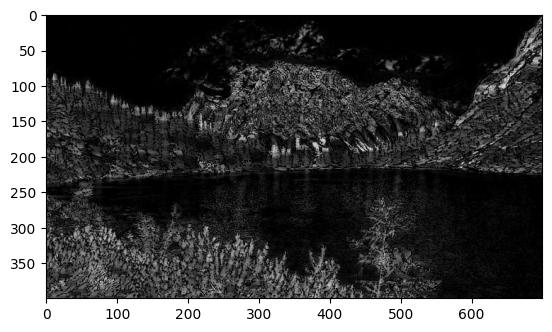

In [34]:
blackhat = cv2.morphologyEx(BGR2GRAY,cv2.MORPH_BLACKHAT,kernel)

plt.imshow(blackhat, cmap='gray')
plt.show()

### a) Investigar una aplicación de erosión en procesamiento de imágenes e implementarlo en Colab

In [57]:
# lee una imagen, la convierte a RGB y también la lee en escala de grises
def get_image_diff_colors(img_path = "data/astronauta.jpg"):
    img = cv2.imread(img_path)
    img1 = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img2 = cv2.imread(img_path,0)

    imgshow(img=img,img1=img1,img2=img2, rows=1,columns=3)

    return img, img1, img2



In [69]:
# convierte una imagen de BGR a escala de grises y luego la muestra
def convert_from_bgr2gray(img):
    BGR2GRAY = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    plt.imshow(BGR2GRAY,cmap="gray")
    plt.show()

    return BGR2GRAY

In [59]:
# erosiona una imagen un número específico de veces y muestra los resultados.
def appy_erosion(image, times=3):
    for i in range(0,times):
        eroded = cv2.erode(image.copy(), None, iterations=i+1)
        plt_imshow("Eroded {} times".format(i+1), eroded)

In [71]:
# aplica una umbralización binaria Otsu a la imagen en escala de grises
# Otsu es un método que elige automáticamente un valor de umbral que minimiza la varianza intraclase en la imagen. 
# El resultado es una imagen binaria almacenada
def apply_otsu_binary_threshold(img):
    binr = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]
    image = cv2.cvtColor(binr, cv2.COLOR_BGR2RGB)
    plt.imshow(image)
    plt.show()

    return binr

In [81]:
# invierte los colores de una imagen binaria y luego la muestra
def appy_binary_inversion(img):
    invert = cv2.bitwise_not(img)
    image = cv2.cvtColor(invert, cv2.COLOR_BGR2RGB)
    plt.imshow(image)
    plt.show()

    return invert


In [79]:
# realiza una operación de erosión en una imagen invertida varias veces y muestra los resultados
def appy_erosion_over_inverted_image(times = 3, img = invert, matrix = (2,2)):
    kernel = np.ones(matrix, np.uint8) #check for 3*3 or 7*7 kernel size too

    for i in range(0,times):
        eroded = cv2.erode(img.copy(),kernel=kernel, iterations=i+1)
        plt_imshow("Eroded {} times".format(i+1), eroded)




In [94]:
def apply_combo_erosion(img_path = "data/astronauta.jpg", erotion_times = 3, kernel_size = (2,2)):
    # lee una imagen, la convierte a RGB y también la lee en escala de grises
    print("lee una imagen, la convierte a RGB y también la lee en escala de grises")
    img, img1, img2 = get_image_diff_colors(img_path)

    print("Convierte una imagen de BGR a escala de grises y luego la muestra")
    BGR2GRAY = convert_from_bgr2gray(img)

    print("Erosiona una imagen un número específico de veces y muestra los resultados.")
    appy_erosion(BGR2GRAY, erotion_times)

    print("Aplica una umbralización binaria Otsu a la imagen en escala de grises")
    binr = apply_otsu_binary_threshold(BGR2GRAY)

    print("Invierte los colores de una imagen binaria y luego la muestra")
    invert = appy_binary_inversion(binr)

    print("Realiza una operación de erosión en una imagen invertida varias veces y muestra los resultados")
    appy_erosion_over_inverted_image(erotion_times, invert, kernel_size)



lee una imagen, la convierte a RGB y también la lee en escala de grises
(576, 800, 3) (576, 800, 3) (576, 800)


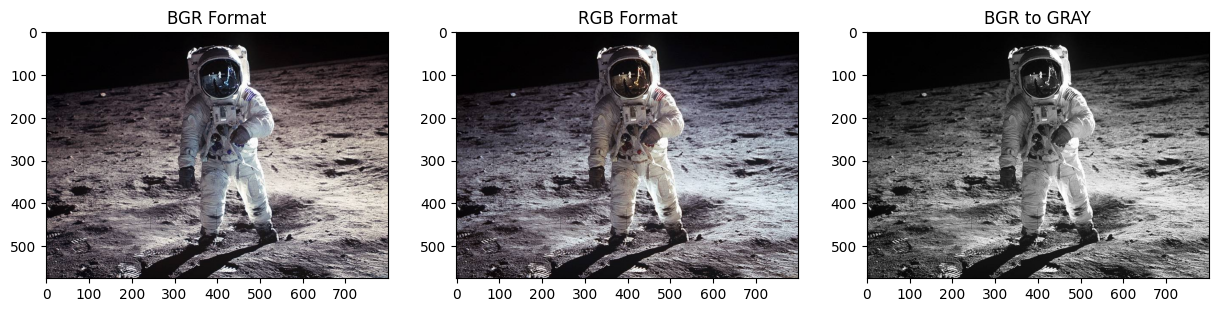

Convierte una imagen de BGR a escala de grises y luego la muestra


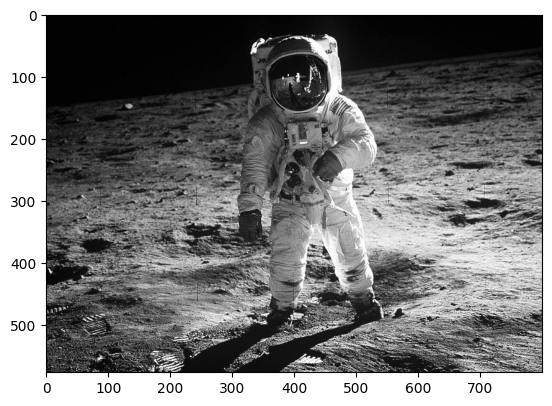

Erosiona una imagen un número específico de veces y muestra los resultados.


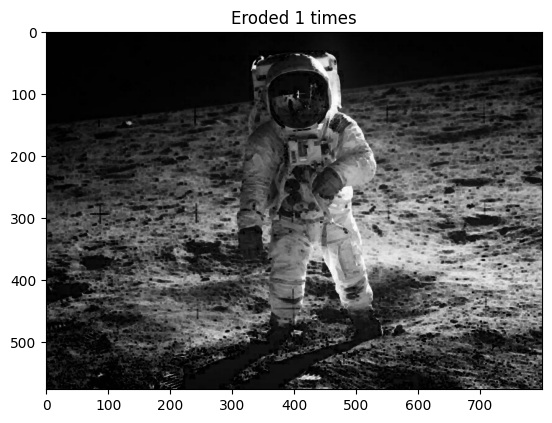

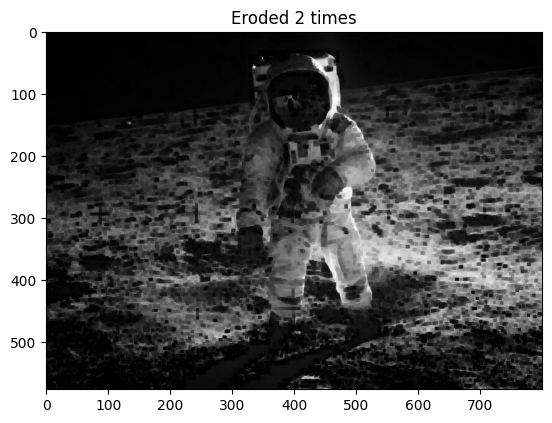

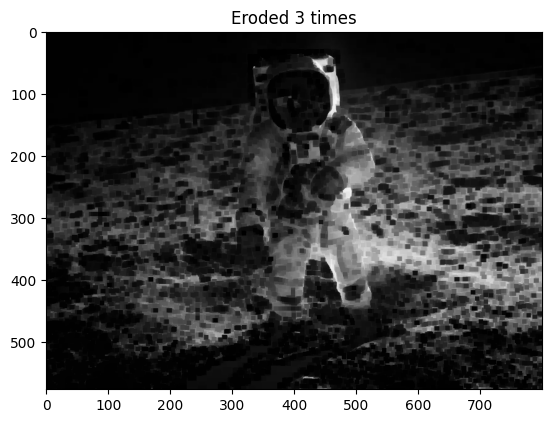

Aplica una umbralización binaria Otsu a la imagen en escala de grises


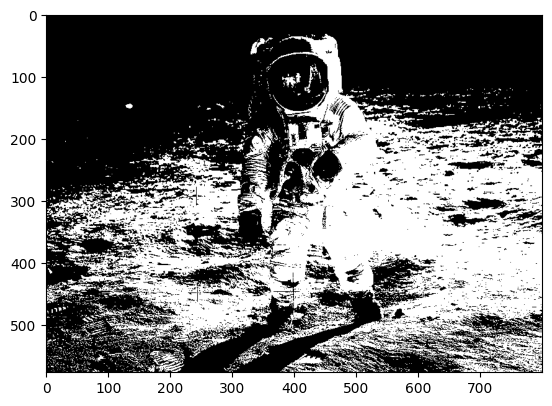

Invierte los colores de una imagen binaria y luego la muestra


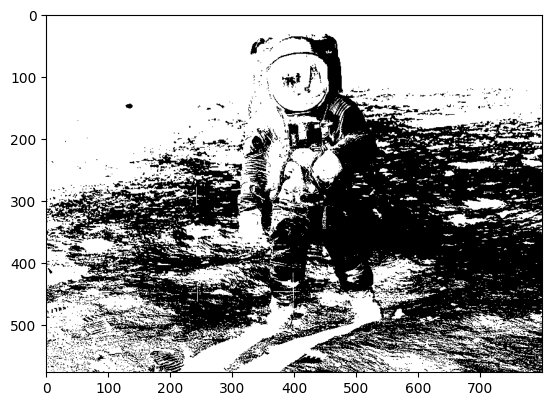

Realiza una operación de erosión en una imagen invertida varias veces y muestra los resultados


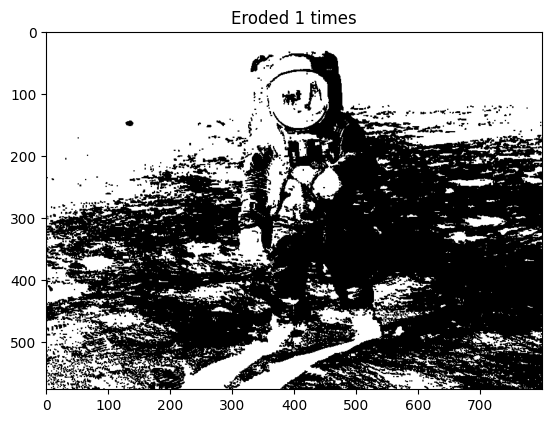

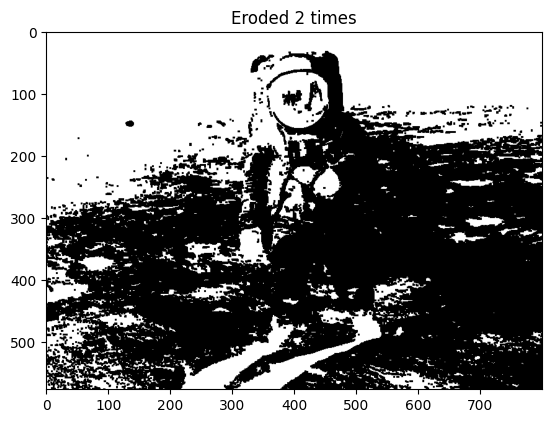

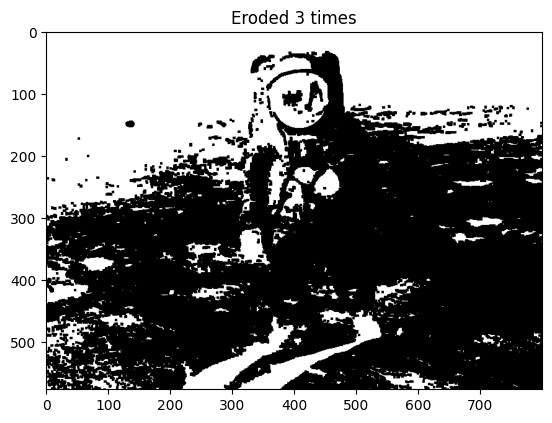

In [95]:
apply_combo_erosion("data/astronauta.jpg", 3, (2,2))

### b) Investigar una aplicación de dilatación en procesamiento de imágenes e implementarlo en Colab

### c) Investigar una aplicación de opening y closing e implementalo en Google Colab